In [2]:
import torch
from torchvision import models

To get the list of various models imported we can use dir() function which return us the list of directories present inside the models

In [3]:
dir(models)   

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mobilenetv2',
 'mobilenetv3',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 '

To load the trained weights in model use "pretrained=True" otherwise the model will give garbage output for given input

In [4]:
resnet = models.resnet101(pretrained = True)    

In [5]:
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),  #Convert the image to Tensor (PyTorch multi dimensional array)  
    transforms.Normalize(   #Normalize RGB values
        std=[0.229 , 0.224 , 0.225],
        mean=[0.229,0.456,0.406]
    )])

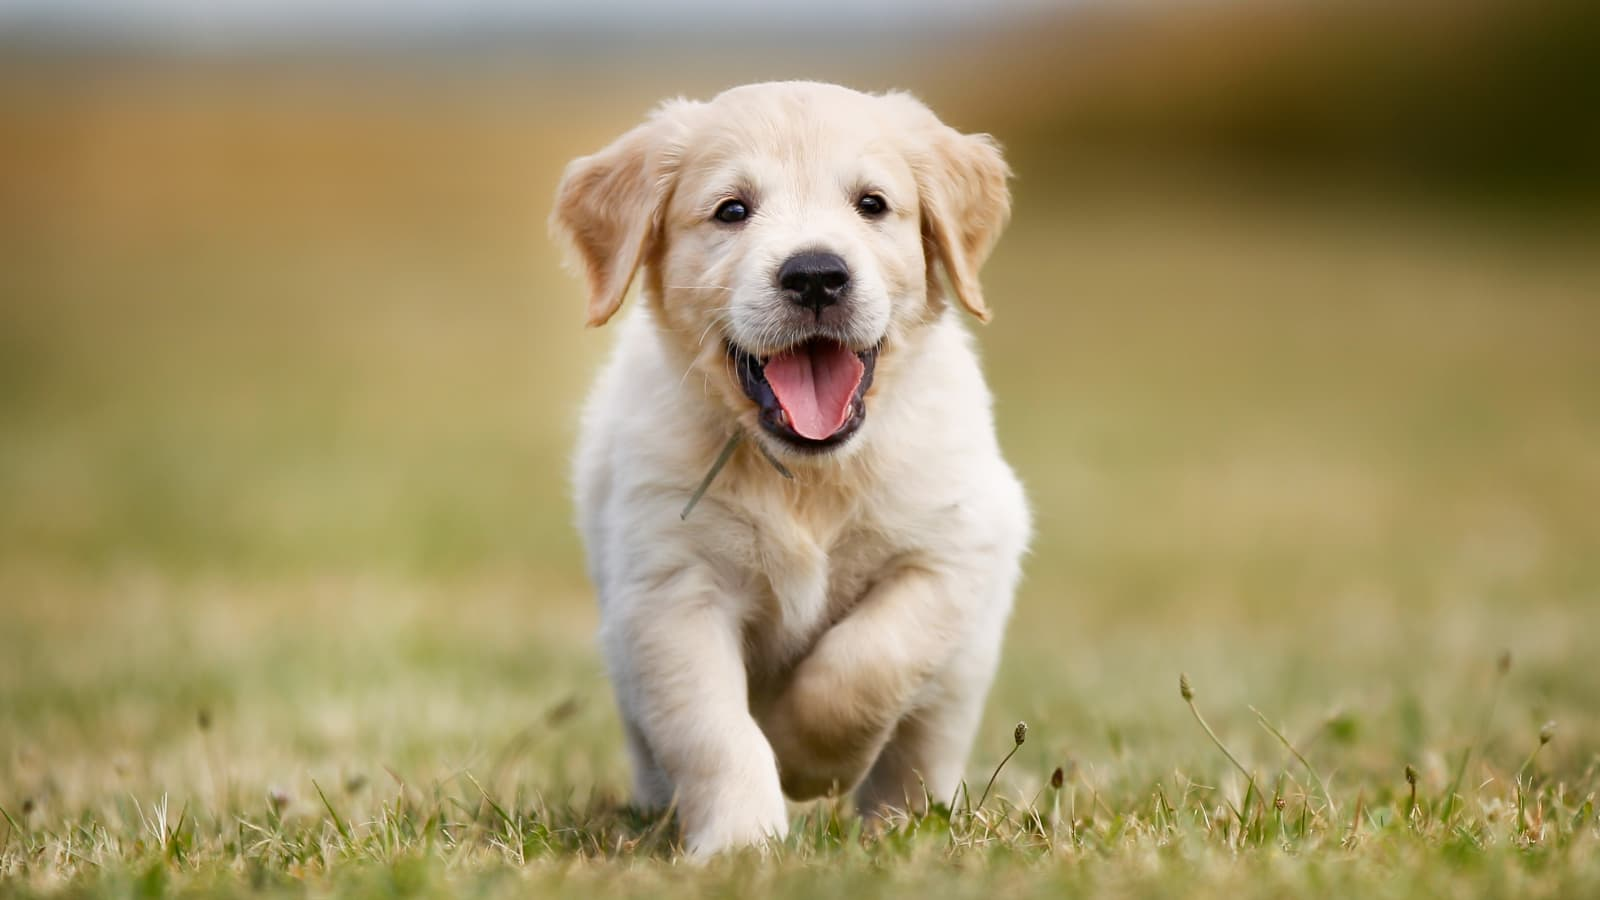

In [11]:
import PIL
from PIL import Image
img = Image.open("E:\\PyTorch\Chapter_2\\assets\\105992231-1561667465295gettyimages-521697453.jpeg")
img

In [12]:
img_transform = preprocess(img)

In [13]:
print(img_transform)

tensor([[[ 1.4660,  1.4660,  1.4831,  ...,  1.1748,  1.1748,  1.1577],
         [ 1.4831,  1.4831,  1.5002,  ...,  1.1406,  1.1406,  1.1235],
         [ 1.5345,  1.5345,  1.5173,  ...,  1.1063,  1.1063,  1.0892],
         ...,
         [ 1.2091,  1.0378,  1.4831,  ...,  2.1167,  1.9968,  1.9112],
         [ 1.7057,  1.4146,  1.5516,  ...,  2.1167,  2.0653,  1.9455],
         [ 1.9112,  1.7228,  1.6543,  ...,  2.1681,  2.0996,  2.0140]],

        [[ 0.3978,  0.3978,  0.4153,  ..., -0.3901, -0.3901, -0.4076],
         [ 0.3978,  0.3978,  0.4153,  ..., -0.4251, -0.4251, -0.4426],
         [ 0.3803,  0.3803,  0.3978,  ..., -0.4426, -0.4426, -0.4426],
         ...,
         [ 0.2577,  0.0301,  0.3627,  ...,  1.0280,  0.9405,  0.8880],
         [ 0.6954,  0.3102,  0.4153,  ...,  1.0280,  0.9930,  0.9230],
         [ 0.8529,  0.5728,  0.5028,  ...,  1.0630,  1.0280,  0.9755]],

        [[ 0.3568,  0.3568,  0.3742,  ..., -1.0898, -1.0898, -1.1073],
         [ 0.3219,  0.3219,  0.3393,  ..., -1

In [14]:
batch_t = torch.unsqueeze(img_transform , 0)

In [15]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [16]:
output = resnet(batch_t)
output

tensor([[-1.7901e+00, -1.9169e+00, -2.4248e+00, -4.2098e+00, -4.1301e+00,
         -2.1931e+00, -4.1635e+00, -1.6870e+00,  3.1043e-01, -2.0749e+00,
          1.1260e-01, -2.0010e+00, -1.7650e+00, -1.8732e+00, -1.0054e+00,
         -9.4686e-01, -1.4813e+00, -5.8284e-01, -1.4810e+00, -6.5775e-01,
         -1.6140e+00, -1.2708e+00, -1.0688e+00,  9.9209e-01, -2.5006e-01,
         -1.1216e-01, -4.5420e-01,  2.6027e-01,  9.5728e-01, -9.7968e-01,
         -1.8646e+00, -2.2820e+00, -1.0680e+00, -2.9710e+00, -1.4573e+00,
         -1.6864e+00, -1.0539e+00, -1.8699e+00,  7.0727e-01,  1.1370e-01,
         -7.0548e-01,  2.1840e-01,  9.3571e-01, -8.1611e-01, -4.0424e-01,
         -4.9547e-01,  5.5151e-01, -1.8359e-02, -1.2128e+00, -1.2658e+00,
         -2.9581e+00, -7.1423e-01, -3.0434e-01, -1.1122e+00, -2.5051e+00,
         -2.1337e+00, -9.8126e-01, -2.1654e+00, -3.2348e+00, -1.2378e+00,
         -7.7322e-01, -2.6007e+00,  1.5743e-01, -2.4336e-01, -1.3874e+00,
         -3.0319e+00, -1.2940e+00, -9.

In [21]:
with open ('data/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [23]:
_ , index = torch.max(output,1)

In [25]:
index

tensor([207])

In [27]:
percentage = torch.nn.functional.softmax(output,dim=1)[0] * 100
labels[index[0]],percentage[index[0]].item()

('golden retriever', 92.86277770996094)